# Assignment 6

Run each cell in the notebook. The explanation of the cells are given on top respectively. You would require keras with tensorflow backend.

In [66]:
import numpy as np
import random
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from keras_team.keras.datasets import mnist

Downloading the Mnist data

In [67]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Scaling the data so that values are between 0 and 1

In [68]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
x_train = x_train/255
x_test = x_test/255

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Creating the training and testing dataset alongwith setting the Y values to 0 or 1 depending on a condition. The condition here is last digit of VUNetId. My last digit is 1. So for the Y values of 1, new value is set to 1(true). Rest of them are set to 0(false). Also the 28x28 dataset is converted to a column vector 784x1.

In [69]:
X = x_train.reshape(60000, 784)  #Converting to column vector for each datapoint
X1 = X.copy()
Y = np.array(y_train == 1)
Y = 1*Y    #Setting values to 1 or 0 for training
Y = Y.reshape(60000, 1)
print(X.shape,Y.shape)

test_X = x_test.reshape(10000,784)
test_X = test_X.transpose()
test_Y = np.array(y_test == 1)
test_Y = 1*test_Y         # Setting values to 1 or 0 for test


(60000, 784) (60000, 1)


In [70]:
total_data = np.concatenate((Y, X), axis = 1)
print(total_data.shape)


(60000, 785)


This is the forward propagation step of the hidden layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a ReLU function

In [71]:
def forward_prop_hidden(W, b, data_X):
    intermediate = np.dot(W, data_X)
    Z = intermediate + b
    A = relu(Z)
    return A, Z

This is the forward propagation step of the output layer. Here W, b and the data is received as input. The operation W.X + b is performed after taking appropriate transpose. The final value is then passed through a sigmoid function to make the value between 0 - 1

In [72]:
def forward_prop_output(W, b, data_X):
    intermediate = np.dot(W, data_X)
    Z = intermediate + b
    A = sigmoid(Z)
    return A


This is the backward propagation step. Here the required derivatives are calculated which will be later updated in further steps.

In [73]:
def backward_prop_1(A1, m, W2, dZ2, Z1, data_X):
    dZ1 = np.dot(W2.T, dZ2) 
    dZ1 = dZ1* relu_derivative(Z1)
    dW1 = np.dot(dZ1, data_X.T)/m
    db1 = np.sum(dZ1, axis =1)/m
    db1 = db1.reshape(-1, 1)
    return dW1, db1, dZ1

This is the backward propagation of output layer(Layer2)

In [74]:
def backward_prop_2(A2, A1, m, data_Y):
    dZ2 = A2 - data_Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis =1)/m
    db2 = db2.reshape(-1, 1)
    return dW2, db2, dZ2

This is the sigmoid activation function used to map any real value between 0 and 1

In [75]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


This is the Rectified Linear Unit(ReLU) activation function

In [76]:
def relu(x):
    return np.maximum(0,x)

This is the derivative of the ReLU function

In [77]:
def relu_derivative(x):
    y = np.array(x > 0)
    y = 1*y
    return y

Computes the cost function for all the training samples

In [78]:
def cost_function(A, m, data_Y):
    total_cost = -(1 / m) * np.sum(data_Y * np.log(A) + (1 - data_Y) * np.log(1 - A))
    return total_cost

Here the results are predicted. The W and b of model are taken as input. The values are predicted using test dataset and then using the actual values the accuracy is computed

In [79]:
def results(W, b, data_X, data_Y):
    A1 = data_X
    for k in range(l-2):
        A1, Z1 = forward_prop_hidden(W[k], b[k], A1)        
    A2 =  forward_prop_output(W[l-2], b[l-2], A1)   
    pred_Y = A2.transpose()
    
    pred_Y = np.around(pred_Y, decimals = 0)   #Rounding off the predicted value to 0 or 1    
    accuracy = accuracy_score(data_Y.T, pred_Y)   
    return accuracy

Plotting the cost function as a function of the iterations. In general we can see that the cost function decreases very fast initially but after a certain number of iterations the rate of decrease is much less which indicates that our neural network is converging hence the error is reducing asymptotically.

In [80]:
def cost_graph(J_arr, cost_arr):
    plt.title('Cost Function Graph')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.plot(J_arr, cost_arr)
    plt.show()

Here we construct the layout of our neural network. The h array contains the number of hidden units in each layer and the value l indicates the total no of layers.

In [81]:
h = [784, 20, 10, 1]     #hidden units
l = 4               #total no of layers

# Minibatch Stochastic Gradient Descent

This is the minibatch stochastic gradient descent. We have hyperparameters of learning rate and we print the training and testing accuracy. Also we plot the decision boundary after training. After that we plot the cost function on basis of number of iterations. We have set the number of batches to 60000/batch size.

Epoch: 0
Batch Count: 0
Batch Count: 200
Epoch: 50
Batch Count: 0
Batch Count: 200
Epoch: 100
Batch Count: 0
Batch Count: 200
Epoch: 150
Batch Count: 0
Batch Count: 200
Epoch: 200
Batch Count: 0
Batch Count: 200
Epoch: 250
Batch Count: 0
Batch Count: 200
Epoch: 300
Batch Count: 0
Batch Count: 200
Epoch: 350
Batch Count: 0
Batch Count: 200
Epoch: 400
Batch Count: 0
Batch Count: 200
Epoch: 450
Batch Count: 0
Batch Count: 200
Epoch: 500
Batch Count: 0
Batch Count: 200
Epoch: 550
Batch Count: 0
Batch Count: 200
Epoch: 600
Batch Count: 0
Batch Count: 200
Epoch: 650
Batch Count: 0
Batch Count: 200
Epoch: 700
Batch Count: 0
Batch Count: 200
Epoch: 750
Batch Count: 0
Batch Count: 200
Epoch: 800
Batch Count: 0
Batch Count: 200
Epoch: 850
Batch Count: 0
Batch Count: 200
Epoch: 900
Batch Count: 0
Batch Count: 200
Epoch: 950
Batch Count: 0
Batch Count: 200
Epoch: 1000
Batch Count: 0
Batch Count: 200
Training error: 0.0 %
Test error: 0.29999999999999716 %


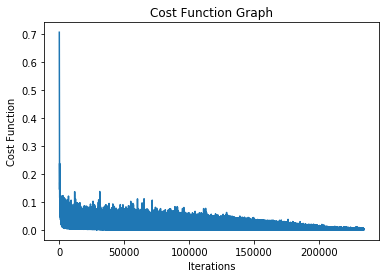

In [82]:
def sgd():
    alpha = 0.01
    W = [None]*(l-1)
    b = [None]*(l-1)
    A = [None]*(l)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    cost_array = []
    J_arr =[]
    epochs = 1001
    count = 0
    for k in range(l-1):
        W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
        b[k] = np.random.rand(h[k+1], 1)*0.0
    for epoch in range(epochs):
        if(epoch%50 == 0):
            print('Epoch:', epoch)
        np.random.shuffle(total_data)
        split_data = np.array_split(total_data, (60000/256))   # set the number of batches
        minibatch_count = 0
        for minibatch in split_data:
            if (epoch%50 == 0 and minibatch_count %200 ==0):
                print('Batch Count:', minibatch_count)
            minibatch_count += 1
            X = np.array(minibatch[:,1:])
            Y = np.array(minibatch[:,0])   # selecting data and the truth value of the minibatches
            train_X = X.T
            train_Y = Y.T
            n, m = train_X.shape
            A[0] = train_X
            for k in range(l-2):
                A[k+1], Z[k+1] = forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
            A[l-1] =  forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

            (dW[l-2], db[l-2], dZ[l-2]) = backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
            for k in reversed(range(l-2)):
                (dW[k], db[k], dZ[k]) = backward_prop_1(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k]) #backpropagation through hidden layer

            for k in range(l-1):
                W[k] = W[k] - alpha*dW[k]
                b[k] = b[k] - alpha*db[k]       #Updating b and W

            total_cost = cost_function(A[l-1], m, train_Y)
            cost_array.append(total_cost)    # Storing the value of cost function
            J_arr.append(count)
            count+= 1

    final_accuracy_test = results(W, b, test_X, test_Y)*100    # Calculating the training and test accuracy
    final_accuracy_train = results(W, b, train_X, train_Y)*100
    print('Training error:', str(100-final_accuracy_train),'%')
    print('Test error:', str(100-final_accuracy_test),'%')
    cost_graph(J_arr, cost_array)    #Plotting the cost vs iterations graph
sgd()

We find that decreasing the batch size increases the accuracy. But it also increases overfitting. Smaller batch size results in the model being too specific to the training data which makes the training accuracy to 0 but testing accuracy greater.

# Minibatch Stochastic Gradient Descent with Momentum

This is the minibatch stochastic gradient descent. We have hyperparameters of learning rate(alpha) and beta. We print the training and testing accuracy. Also we plot the decision boundary after training. After that we plot the cost function on basis of number of iterations.

Epoch: 0
Batch Count: 0
Batch Count: 200
Batch Count: 0
Batch Count: 200
Epoch: 100
Batch Count: 0
Batch Count: 200
Batch Count: 0
Batch Count: 200
Epoch: 200
Batch Count: 0
Batch Count: 200
Batch Count: 0
Batch Count: 200
Epoch: 300
Batch Count: 0
Batch Count: 200
Batch Count: 0
Batch Count: 200
Epoch: 400
Batch Count: 0
Batch Count: 200
Batch Count: 0
Batch Count: 200
Epoch: 500
Batch Count: 0
Batch Count: 200
Training error: 0.0 %
Test error: 0.2600000000000051 %


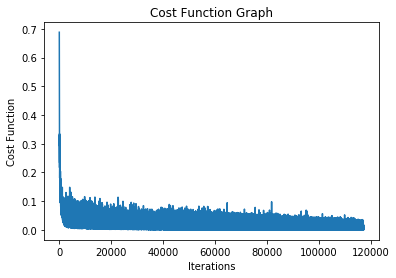

In [83]:
def sgd_mom():
    alpha = 0.01
    beta = 0.9
    W = [None]*(l-1)
    b = [None]*(l-1)
    VdW = [None]*(l-1)
    Vdb = [None]*(l-1)
    A = [None]*(l)
    dW = [None]*(l-1)
    db = [None]*(l-1)
    dZ = [None]*(l-1)
    Z = [None]*(l)
    cost_array = []
    J_arr =[]
    epochs = 501
    count = 0
    for k in range(l-1):
        W[k] = np.random.randn(h[k+1],h[k])/np.sqrt(h[k])     #Initializing W and b
        b[k] = np.random.rand(h[k+1], 1)*0.0
        VdW[k] = np.random.rand(h[k+1],h[k])*0.0
        Vdb[k] =np.random.rand(h[k+1], 1)*0.0
    for epoch in range(epochs):
        if(epoch%100 == 0):
            print('Epoch:', epoch)
        np.random.shuffle(total_data)
        split_data = np.array_split(total_data, (60000/256))   #set the number of batches
        minibatch_count = 0
        for minibatch in split_data:
            if (epoch%50 == 0 and minibatch_count %200 ==0):
                print('Batch Count:', minibatch_count)
            minibatch_count += 1
            X = np.array(minibatch[:,1:])
            Y = np.array(minibatch[:,0])        #selecting data and truth values of minibatches
            train_X = X.T
            train_Y = Y.T
            n, m = train_X.shape
            A[0] = train_X
            for k in range(l-2):
                A[k+1], Z[k+1] = forward_prop_hidden(W[k], b[k], A[k])         #forward propagation through hidden layer  
            A[l-1] =  forward_prop_output(W[l-2], b[l-2], A[l-2])     #forward propagation through output layer         

            (dW[l-2], db[l-2], dZ[l-2]) = backward_prop_2(A[l-1], A[l-2], m, train_Y)  #backpropagation through output layer
            for k in reversed(range(l-2)):
                (dW[k], db[k], dZ[k]) = backward_prop_1(A[k+1], m, W[k+1], dZ[k+1], Z[k+1], A[k]) #backpropagation through hidden layer

            for k in range(l-1):
                VdW[k] = beta*VdW[k] + (1-beta)*dW[k]   #Using velocity
                Vdb[k] = beta*Vdb[k] + (1-beta)*db[k]
                W[k] = W[k] - alpha*VdW[k]
                b[k] = b[k] - alpha*Vdb[k]       #Updating b and W

            total_cost = cost_function(A[l-1], m, train_Y)
            cost_array.append(total_cost)    # Storing the value of cost function
            J_arr.append(count)
            count+= 1

    final_accuracy_test = results(W, b, test_X, test_Y)*100    # Calculating the training and test accuracy
    final_accuracy_train = results(W, b, train_X, train_Y)*100
    print('Training error:', str(100-final_accuracy_train),'%')
    print('Test error:', str(100-final_accuracy_test),'%')
    cost_graph(J_arr, cost_array)
sgd_mom()

Here we find that decreasing the momentum parameter decreases the accuracy, i.e increases the error. It was already suggested to set the momentum parameter to 0.9. At this value of beta, the error is very low though there might be some overfitting.